In [78]:
from random import random
import matplotlib.pyplot as plt
from collections import defaultdict

In [79]:
# a source of random numbers
random()

0.6316696366339524

In [144]:
# let's simulate FAIR coinflips
def coinflip():
    if random() < 0.5:
        return 'H'
    else:
        return 'T'

In [154]:
coinflip()

'H'

In [155]:
def coinflip():
    if random() < 0.5:
        return 1
    else:
        return 0

In [81]:
coinflip()

0

In [38]:
# 10 coinflips
[coinflip() for _ in range(10)]

[1, 0, 1, 0, 0, 0, 1, 0, 1, 1]

In [44]:
sum([coinflip() for _ in range(10)])

5

In [158]:
def coinflips(num_flips=10):
    return sum([coinflip() for _ in range(num_flips)])

In [168]:
coinflips(10)

5

In [169]:
[coinflips(10) for _ in range(10)]

[6, 5, 2, 5, 6, 4, 4, 3, 6, 5]

In [172]:
NUM_FLIPS = 10
NUM_EXPERIMENTS = 10
outcomes = [coinflips(NUM_FLIPS) for _ in range(NUM_EXPERIMENTS)]
count = defaultdict(lambda: 0)
for outcome in outcomes:
    count[outcome] += 1
for i in range(NUM_FLIPS+1):
    print('Out of {} experiments, we flipped {} heads {} times'.format(
        NUM_EXPERIMENTS, i, count[i]))

Out of 10 experiments, we wlipped 0 heads 0 times
Out of 10 experiments, we wlipped 1 heads 0 times
Out of 10 experiments, we wlipped 2 heads 1 times
Out of 10 experiments, we wlipped 3 heads 2 times
Out of 10 experiments, we wlipped 4 heads 3 times
Out of 10 experiments, we wlipped 5 heads 2 times
Out of 10 experiments, we wlipped 6 heads 1 times
Out of 10 experiments, we wlipped 7 heads 0 times
Out of 10 experiments, we wlipped 8 heads 1 times
Out of 10 experiments, we wlipped 9 heads 0 times
Out of 10 experiments, we wlipped 10 heads 0 times


In [184]:
NUM_FLIPS = 10
NUM_EXPERIMENTS = 1000*1000
outcomes = [coinflips(NUM_FLIPS) for _ in range(NUM_EXPERIMENTS)]
count = defaultdict(lambda: 0)
for outcome in outcomes:
    count[outcome] += 1
for i in range(NUM_FLIPS+1):
    print('Out of {} experiments, we flipped {} heads {} times'.format(
        NUM_EXPERIMENTS, i, count[i]))

Out of 1000000 experiments, we flipped 0 heads 1004 times
Out of 1000000 experiments, we flipped 1 heads 9719 times
Out of 1000000 experiments, we flipped 2 heads 44091 times
Out of 1000000 experiments, we flipped 3 heads 116981 times
Out of 1000000 experiments, we flipped 4 heads 206072 times
Out of 1000000 experiments, we flipped 5 heads 245371 times
Out of 1000000 experiments, we flipped 6 heads 205059 times
Out of 1000000 experiments, we flipped 7 heads 117282 times
Out of 1000000 experiments, we flipped 8 heads 43764 times
Out of 1000000 experiments, we flipped 9 heads 9675 times
Out of 1000000 experiments, we flipped 10 heads 982 times


In [185]:
NUM_FLIPS = 10
NUM_EXPERIMENTS = 1000*1000
outcomes = [coinflips(NUM_FLIPS) for _ in range(NUM_EXPERIMENTS)]
count = defaultdict(lambda: 0)
for outcome in outcomes:
    count[outcome] += 1
for i in range(NUM_FLIPS+1):
    print('Out of {} experiments, we flipped {} heads {:.2f}% of the time'.format(
        NUM_EXPERIMENTS, i, 100*count[i]/NUM_EXPERIMENTS))

Out of 1000000 experiments, we flipped 0 heads 0.10% of the time
Out of 1000000 experiments, we flipped 1 heads 0.99% of the time
Out of 1000000 experiments, we flipped 2 heads 4.40% of the time
Out of 1000000 experiments, we flipped 3 heads 11.71% of the time
Out of 1000000 experiments, we flipped 4 heads 20.53% of the time
Out of 1000000 experiments, we flipped 5 heads 24.59% of the time
Out of 1000000 experiments, we flipped 6 heads 20.51% of the time
Out of 1000000 experiments, we flipped 7 heads 11.70% of the time
Out of 1000000 experiments, we flipped 8 heads 4.39% of the time
Out of 1000000 experiments, we flipped 9 heads 0.97% of the time
Out of 1000000 experiments, we flipped 10 heads 0.10% of the time


In [76]:
# WHAT IS THE P-VALUE?
# --------------------
# given an experimental outcome: "we flip 7 Heads out of 10"
# assume the "boring", "non-action" case (aka the "Null Hypothesis") = the coin is FAIR, it's NOT biased
# compute the probability of the experimental outcome (7 Heads) in the "boring" case (=11.69%)
# .. and also add to it the probabilities of even-more-extreme outcomes (8, 9, 10 Heads) (+ 4.36% + 0.98% + 0.10%)
# = 17.13%
# Technical comment: ignoring 1-sided vs 2 sided here.
# 
# So: in real life, we don't know if the coin is fair or not. We just know we flipped 7 Heads out of 10.
# What we know from the above is, if we assume it's FAIR, we would see this outcome, or more extreme outcome,
# 17% of the time. That is not very unlikely, about 1 in 6.
# 
# STATISTICAL SIGNIFICANCE
# ------------------------
# So: is this statistically significant? What does statistically significant even mean?
# Stat.sign. is a way to make a decision based on the above. It's a PRE-AGREED UPON p_critical
# threshold for the p-value, so that if p < p_critical, we declare the result "statistically significant"
# and we reject the "boring" Null Hypothesis.
# Boring = coin is fair, rejecting it means we conclude the coin is biased.
# It's just a human-agreement for decision-making.
# Usually p_critical = 0.05 or 5% or 1 in 20, but this is completely arbitrary, there is nothing
# special or "right" about 5%.
# We can agree that we will use 1% or 10% in our experiments.
# 
# From the above we can see that for 10 coin flips, if p_critical is 5%, we'd need to get 0, 1 or 9, 10 Heads
# to conclude that the coin is biased.

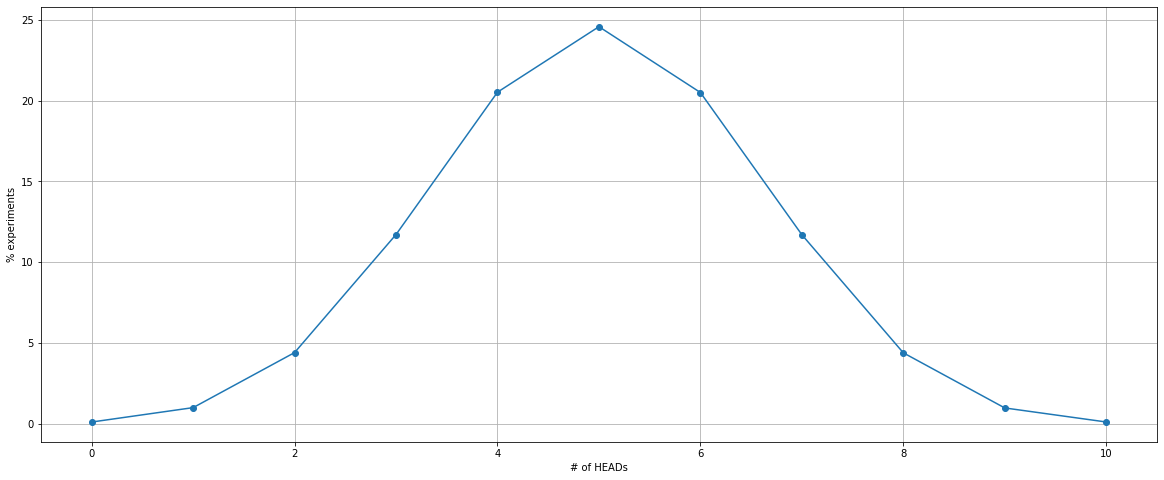

In [186]:
x = list(range(NUM_FLIPS+1))
y = [100*count[i]/NUM_EXPERIMENTS for i in x]
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(x, y, marker='o')
ax.set(xlabel='# of HEADs', ylabel='% experiments',
       title='')
ax.grid()
plt.show()

In [ ]:
# before we go on... we saw that 7 Heads out of 10 coinflips was not unusual.
# What if we get 70 Heads out of 100 coinflips? Is that unusual.
# Remember that unusual is, compared to a FAIR coin.
# Well, let's see!

In [187]:
NUM_FLIPS = 100
NUM_EXPERIMENTS = 100*1000
outcomes = [coinflips(NUM_FLIPS) for _ in range(NUM_EXPERIMENTS)]
count = defaultdict(lambda: 0)
for outcome in outcomes:
    count[outcome] += 1
for i in range(NUM_FLIPS+1):
    print('Out of {} experiments, we flipped {} heads {:.3f}% of the time'.format(
        NUM_EXPERIMENTS, i, 100*count[i]/NUM_EXPERIMENTS))    

Out of 100000 experiments, we flipped 0 heads 0.000% of the time
Out of 100000 experiments, we flipped 1 heads 0.000% of the time
Out of 100000 experiments, we flipped 2 heads 0.000% of the time
Out of 100000 experiments, we flipped 3 heads 0.000% of the time
Out of 100000 experiments, we flipped 4 heads 0.000% of the time
Out of 100000 experiments, we flipped 5 heads 0.000% of the time
Out of 100000 experiments, we flipped 6 heads 0.000% of the time
Out of 100000 experiments, we flipped 7 heads 0.000% of the time
Out of 100000 experiments, we flipped 8 heads 0.000% of the time
Out of 100000 experiments, we flipped 9 heads 0.000% of the time
Out of 100000 experiments, we flipped 10 heads 0.000% of the time
Out of 100000 experiments, we flipped 11 heads 0.000% of the time
Out of 100000 experiments, we flipped 12 heads 0.000% of the time
Out of 100000 experiments, we flipped 13 heads 0.000% of the time
Out of 100000 experiments, we flipped 14 heads 0.000% of the time
Out of 100000 experi

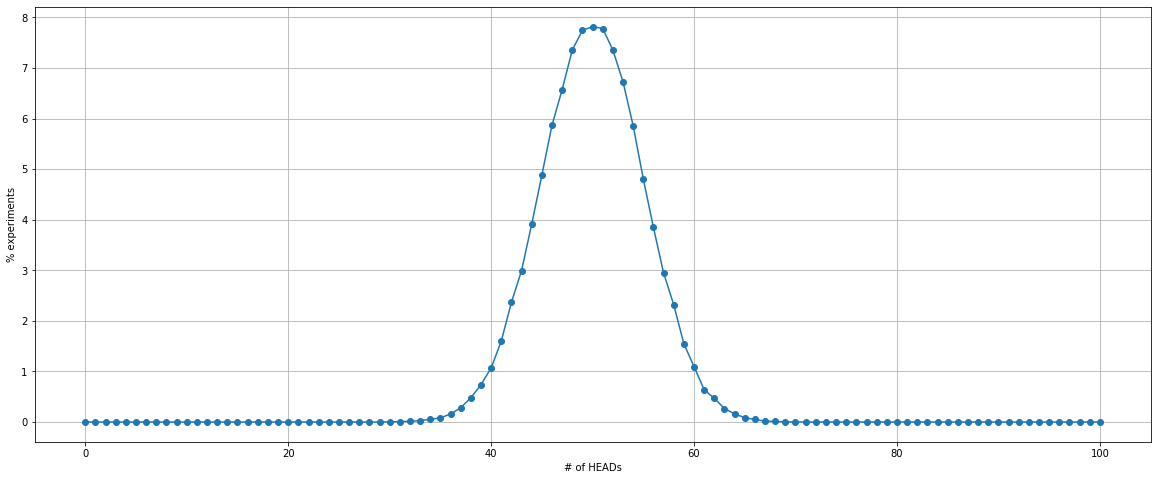

In [188]:
x = list(range(NUM_FLIPS+1))
y = [100*count[i]/NUM_EXPERIMENTS for i in x]
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(x, y, marker='o')
ax.set(xlabel='# of HEADs', ylabel='% experiments',
       title='')
ax.grid()
plt.show()

In [ ]:
# Here, a 70% Heads outcome (70 out of 100 and 7 out of 10 is both 70%)
# yields a much-much smaller p-value: 17% vs 0.001%
# Why?
# This is the magic of sample size! N=100 flips is a lot more than N=10 flips.
# Telling apart a biased and a fair coin is much easier if you flip more and more.
# If we flip a coin 100 times and get 70 Heads, then it is very unlikely (0.001%) that this coin is fair.

In [ ]:
# OKAY, now that we have built our intuition with coin flips, let's talk about a marketing A/B test.
# Suppose we have a Control (A) and a Treatment (B) version of an email.
# Maybe A reminds customers to go to Vox, while B also offers tham a 10% discount.
# Let's say we send it out to N=1000 customers.
# A converts at 10% and B converts at 12%.
# What can we say?
# It's actually the same thing as coin-flips. Except here, the "fair" base coin is not a 50-50 coin,
# it's the 10% conversion we see in our control group A.

In [189]:
# let's simulate coinflips
def coinflip():
    if random() < 0.10:
        return 1
    else:
        return 0

In [191]:
coinflips(100)

11

In [192]:
NUM_FLIPS = 1000
NUM_EXPERIMENTS = 10*1000
outcomes = [coinflips(NUM_FLIPS) for _ in range(NUM_EXPERIMENTS)]
count = defaultdict(lambda: 0)
for outcome in outcomes:
    count[outcome] += 1
for i in range(NUM_FLIPS+1):
    print('Out of {} experiments, we flipped {} heads {:.2f}% of the time'.format(
        NUM_EXPERIMENTS, i, 100*count[i]/NUM_EXPERIMENTS))

Out of 10000 experiments, we flipped 0 heads 0.00% of the time
Out of 10000 experiments, we flipped 1 heads 0.00% of the time
Out of 10000 experiments, we flipped 2 heads 0.00% of the time
Out of 10000 experiments, we flipped 3 heads 0.00% of the time
Out of 10000 experiments, we flipped 4 heads 0.00% of the time
Out of 10000 experiments, we flipped 5 heads 0.00% of the time
Out of 10000 experiments, we flipped 6 heads 0.00% of the time
Out of 10000 experiments, we flipped 7 heads 0.00% of the time
Out of 10000 experiments, we flipped 8 heads 0.00% of the time
Out of 10000 experiments, we flipped 9 heads 0.00% of the time
Out of 10000 experiments, we flipped 10 heads 0.00% of the time
Out of 10000 experiments, we flipped 11 heads 0.00% of the time
Out of 10000 experiments, we flipped 12 heads 0.00% of the time
Out of 10000 experiments, we flipped 13 heads 0.00% of the time
Out of 10000 experiments, we flipped 14 heads 0.00% of the time
Out of 10000 experiments, we flipped 15 heads 0.00

In [194]:
NUM_FLIPS = 1000
NUM_EXPERIMENTS = 10*1000
outcomes = [coinflips(NUM_FLIPS) for _ in range(NUM_EXPERIMENTS)]
count = defaultdict(lambda: 0)
for outcome in outcomes:
    count[outcome] += 1
for i in range(NUM_FLIPS+1):
    print('Out of {} experiments, we had {:.2f}% conversion {:.2f}% of the time'.format(
        NUM_EXPERIMENTS, 100*i/NUM_FLIPS, 100*count[i]/NUM_EXPERIMENTS))

Out of 10000 experiments, we had 0.00% conversion 0.00% of the time
Out of 10000 experiments, we had 0.10% conversion 0.00% of the time
Out of 10000 experiments, we had 0.20% conversion 0.00% of the time
Out of 10000 experiments, we had 0.30% conversion 0.00% of the time
Out of 10000 experiments, we had 0.40% conversion 0.00% of the time
Out of 10000 experiments, we had 0.50% conversion 0.00% of the time
Out of 10000 experiments, we had 0.60% conversion 0.00% of the time
Out of 10000 experiments, we had 0.70% conversion 0.00% of the time
Out of 10000 experiments, we had 0.80% conversion 0.00% of the time
Out of 10000 experiments, we had 0.90% conversion 0.00% of the time
Out of 10000 experiments, we had 1.00% conversion 0.00% of the time
Out of 10000 experiments, we had 1.10% conversion 0.00% of the time
Out of 10000 experiments, we had 1.20% conversion 0.00% of the time
Out of 10000 experiments, we had 1.30% conversion 0.00% of the time
Out of 10000 experiments, we had 1.40% conversio

In [207]:
print('p_value = ' + str(100*sum([count[i] for i in range(int(NUM_FLIPS*0.12), NUM_FLIPS)])/NUM_EXPERIMENTS) + '%')

p_value = 2.13%


In [ ]:
# the probability that the B actually also converts at 10% like A, but we observe 12% on N=1000 samples
# is p = 2.13%. Assuming we agreed on a p_critical of 5%, we would reject the "boring" (null hypothesis)
# case of A and B being the same, and we'd conclude that B has a better conversion than A.
# Or: "a 10% vs 12% conversion on N=1,000 samples is stat.significant at p_critical = 0.05."